In [1]:
import sys,os
from pathlib import Path
sys.path.append(str(Path("../")))
sys.path.append(str(Path("../../AMLD2020")))
sys.path.append(str(Path("../../AMLD2020/src/face_enhancer")))

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np
from utils import loaders,model_face_res

NUM_GPU=torch.cuda.device_count()
#-------------------------------------Loader Building---------------------------------
Root="/home/jovyan/at091-project-group18/dance_now"
train_set=loaders.CostumImFolder([Root+"/rslt/soldier/fake_headimg/"],
                                 [Root+"/data/soldier/train_label/"],
                                 [Root+"/data/soldier/train_headimg/"],ifbody=False,ifhead=True)
train_loader=DataLoader(train_set, batch_size=2, shuffle=True,num_workers = 4*NUM_GPU,pin_memory=True)

print(train_set.transform)
GAN_DIM=24+5+5+1
HEAD_GAN_DIM=14+1

Compose(
    Lambda()
    ToTensor()
    <class 'torch.FloatTensor'>
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
im1=imread(train_set.target_img[10])
print(im1.shape,im1.max(),im1.min())
im2=imread(train_set.samples_img[10])
print(im2.shape,im1.max(),im1.min())

(64, 64, 3) 255 0
(64, 64, 3) 255 0


In [2]:
G=torch.load("../model_face/netGface_struct.pth").cuda()
G.load_state_dict(torch.load("../model_face/netGface_S_run140.pt"))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3]:
with torch.no_grad():
    for in_img,_,head_mtx,_,tgt_img  in train_loader:
        #head_input=torch.tensor(head_mtx,dtype=torch.float32, device=torch.device('cuda:0'))
        head_lbl=torch.tensor(head_mtx,dtype=torch.float32, device=torch.device('cuda:0'))
        fake_head=torch.tensor(in_img,dtype=torch.float32, device=torch.device('cuda:0'))
        
        head_input=torch.cat((fake_head, head_lbl), dim=1)
        
        #head_input=fake_head
        head_buff=G(head_input)
        enhanced_head=head_buff
            
        break

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


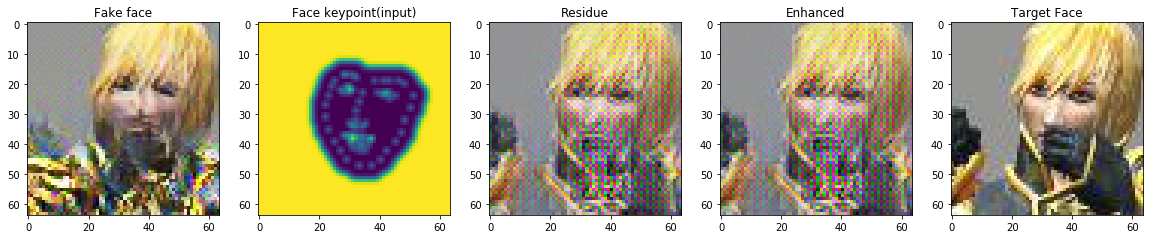

In [5]:
def norm_0to1(inp):
    return (inp-inp.min())/(inp.max()-inp.min())
import matplotlib.pyplot as plt
import cv2
BTCH=1
plt.figure(figsize=(20,40))
plt.subplot(1,5,1)
plt.imshow(norm_0to1(in_img[BTCH,...]).detach().cpu().numpy().transpose(1,2,0))
plt.title("Fake face")
KERNEL=np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 1, 1],
                 [0, 1, 1, 1, 0],
                 [0, 0, 1, 0, 0]], dtype=np.uint8)
KERNEL_=np.array([[0, 0, 1, 1 ,1, 0, 0],
                 [0, 1, 1, 1, 1, 1, 0],
                 [1, 1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1, 1, 1],
                 [0, 1, 1, 1, 1, 1, 0],
                 [0, 0, 1, 1 ,1, 0, 0]], dtype=np.uint8)
plt.subplot(1,5,2)
plt.imshow(head_mtx[BTCH,0:15,...].detach().type(torch.float32).cpu().numpy().sum(0))
plt.title("Face keypoint(input)")
plt.subplot(1,5,3)
plt.imshow(norm_0to1(head_buff[BTCH,...]).detach().cpu().numpy().transpose(1,2,0))
plt.title("Residue")
plt.subplot(1,5,4)
plt.imshow(norm_0to1(enhanced_head[BTCH,...]).detach().cpu().numpy().transpose(1,2,0))
plt.title("Enhanced")
plt.subplot(1,5,5)
plt.imshow(norm_0to1(tgt_img[BTCH,...]).detach().cpu().numpy().transpose(1,2,0))
plt.title("Target Face")
plt.show()

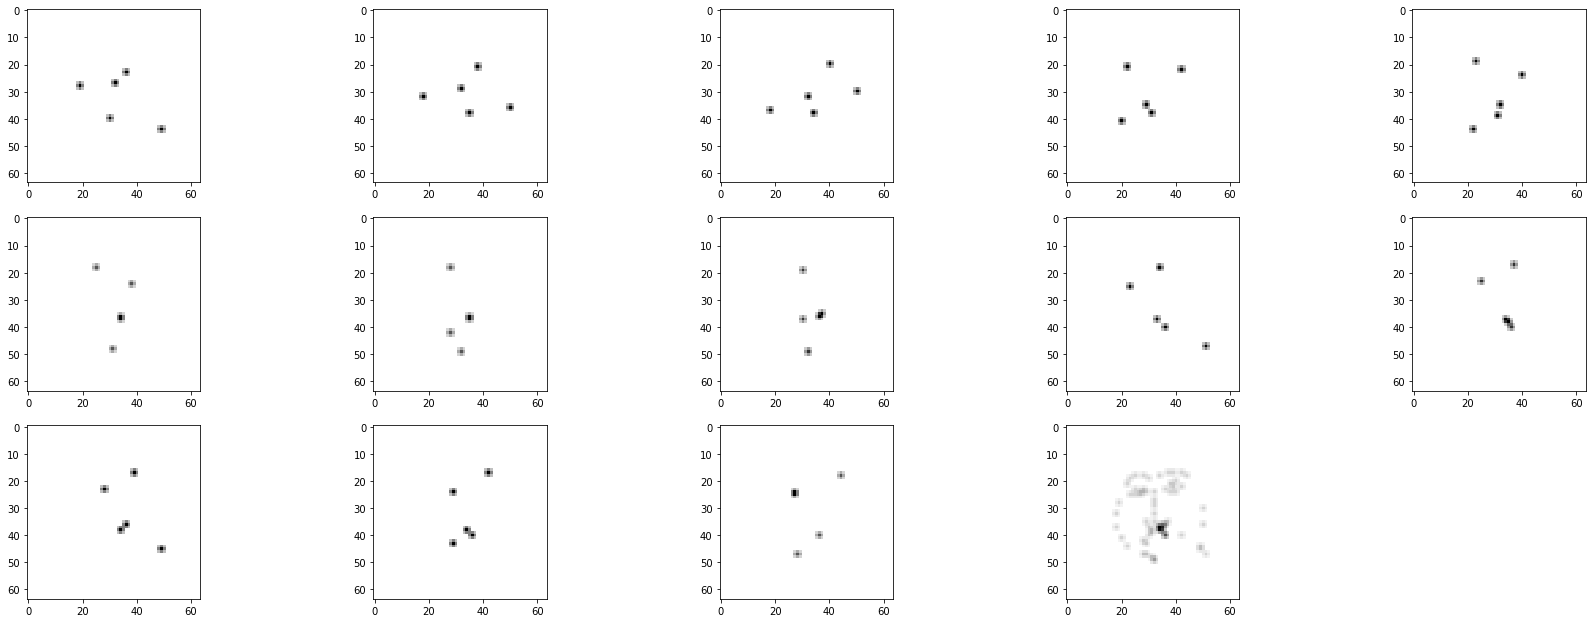

In [7]:
def norm_0to1(inp):
    return (inp-inp.min())/(inp.max()-inp.min())
import matplotlib.pyplot as plt
import cv2


plt.figure(figsize=(30,30))
for ii in range(13):
    plt.subplot(8,5,ii+1)
    plt.imshow(1-head_mtx[BTCH,ii:ii+1,...].detach().type(torch.float32).cpu().numpy().sum(0),"gray")
plt.subplot(8,5,ii+2)
plt.imshow(1-head_mtx[BTCH,0:14,...].detach().type(torch.float32).cpu().numpy().sum(0),"gray")
plt.show()

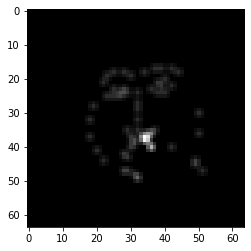

In [8]:
plt.imshow(head_mtx[BTCH,0:14,...].detach().type(torch.float32).cpu().numpy().sum(0),"gray")

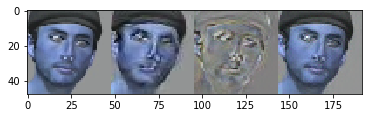

In [10]:
img = cv2.imread('../../AMLD2020/checkpoints/run/face/logs/40000_enhanced_head.png')
plt.imshow(img)
plt.show()

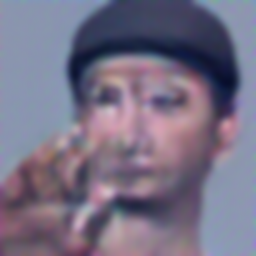

In [354]:
from PIL import ImageFilter
from PIL import Image
import torchvision.transforms as ts
trans=ts.Compose(
        [ts.ToPILImage(),
         ts.Resize((256,256)),
         ts.Lambda(lambda x:x.filter(ImageFilter.GaussianBlur(radius=3))),
         ts.Resize((64,64)),
         ])

im1=trans(in_img[BTCH,...].detach().cpu())
im1

In [339]:
import PIL
im=PIL.Image.filter(ImageFilter.MaxFilter(size=3))(im1)

AttributeError: module 'PIL.Image' has no attribute 'filter'

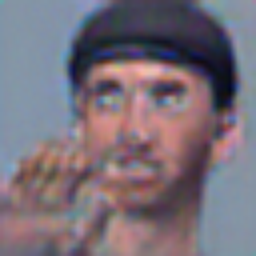

In [297]:
im1

In [150]:
Impulse=np.zeros([7,7],dtype=np.float32)
Impulse[3,3]=1
GaussKernel=cv2.GaussianBlur(Impulse,(7,7),0)
GaussKernel=cv2.GaussianBlur(GaussKernel,(7,7),0)
rng=GaussKernel.max()-GaussKernel.min()
GaussKernel=(GaussKernel-0.026)/rng
GaussKernel=(GaussKernel/GaussKernel.sum())

In [151]:
GaussKernel

array([[-1.8327495 , -1.3511765 , -0.38143352,  0.1067364 , -0.38143352,
        -1.3511765 , -1.8327495 ],
       [-1.3511765 , -0.8040161 ,  0.2978001 ,  0.85245585,  0.2978001 ,
        -0.8040161 , -1.3511765 ],
       [-0.38143352,  0.2978001 ,  1.6655719 ,  2.35411   ,  1.6655719 ,
         0.2978001 , -0.38143352],
       [ 0.1067364 ,  0.85245585,  2.35411   ,  3.1100447 ,  2.35411   ,
         0.85245585,  0.1067364 ],
       [-0.38143352,  0.2978001 ,  1.6655719 ,  2.35411   ,  1.6655719 ,
         0.2978001 , -0.38143352],
       [-1.3511765 , -0.8040161 ,  0.2978001 ,  0.85245585,  0.2978001 ,
        -0.8040161 , -1.3511765 ],
       [-1.8327495 , -1.3511765 , -0.38143352,  0.1067364 , -0.38143352,
        -1.3511765 , -1.8327495 ]], dtype=float32)

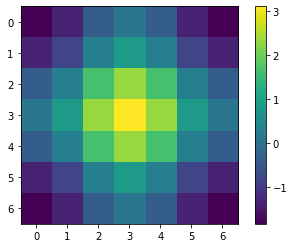

In [152]:
plt.imshow(GaussKernel)
plt.colorbar()

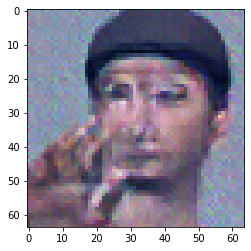

In [162]:
Face=in_img[BTCH,...].detach().cpu().numpy().transpose(1,2,0)
Face=cv2.resize(Face, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
#print(type(Face[0,0,0]))
Face=cv2.medianBlur(Face,5)
Face=cv2.resize(Face, dsize=(64, 64), interpolation=cv2.INTER_NEAREST)
plt.imshow(Face)

In [14]:
real_labels=torch.ones([2,5,10,10],dtype=torch.float32)
with torch.no_grad():
    ones = torch.ones_like(real_labels)
    zeros = torch.zeros_like(real_labels)

    # one sided label smoothing for vanilla gan
    ones.uniform_(.9, 1.1)
    zeros.uniform_(-.1, .1)

In [19]:
ones.min()

tensor(0.9001)

In [3]:

from utils import loaders,model_body
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import numpy as np


NUM_GPU=torch.cuda.device_count()
EPOCHS=100
NITER=20
#-------------------------------------Loader Building---------------------------------

train_set=loaders.CostumImFolder(["./data/anime/train_img/"],
                                 ["./data/anime/train_label/"],
                                 ["./data/anime/train_img/"],ifhead=False,ifbody=True)
train_loader=DataLoader(train_set, batch_size=8,\
                        shuffle=False,num_workers = 4*NUM_GPU,pin_memory=True)
for in_img,lbl_sample,head_center,cc,dd in train_loader:
    break
#for in_img,head_mtx ,im_target, cc , dd,ee in train_loader:
#    break

img_1_1_keypoints-checkpoint.json not imported


In [3]:
a=["123"]
if a:
    print("yes")

yes


In [6]:
for in_img,lbl_sample,_,_,_ in train_loader:
    with torch.no_grad():
        out_img = big_model.netG(torch.tensor(lbl_sample,dtype=torch.float32, device=torch.device('cuda:0')))
    break

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
list(big_model.netG.parameters()).__len__()
#(list(big_model.netG.parameters())+list(big_model.facenetG.parameters())).__len__()

36

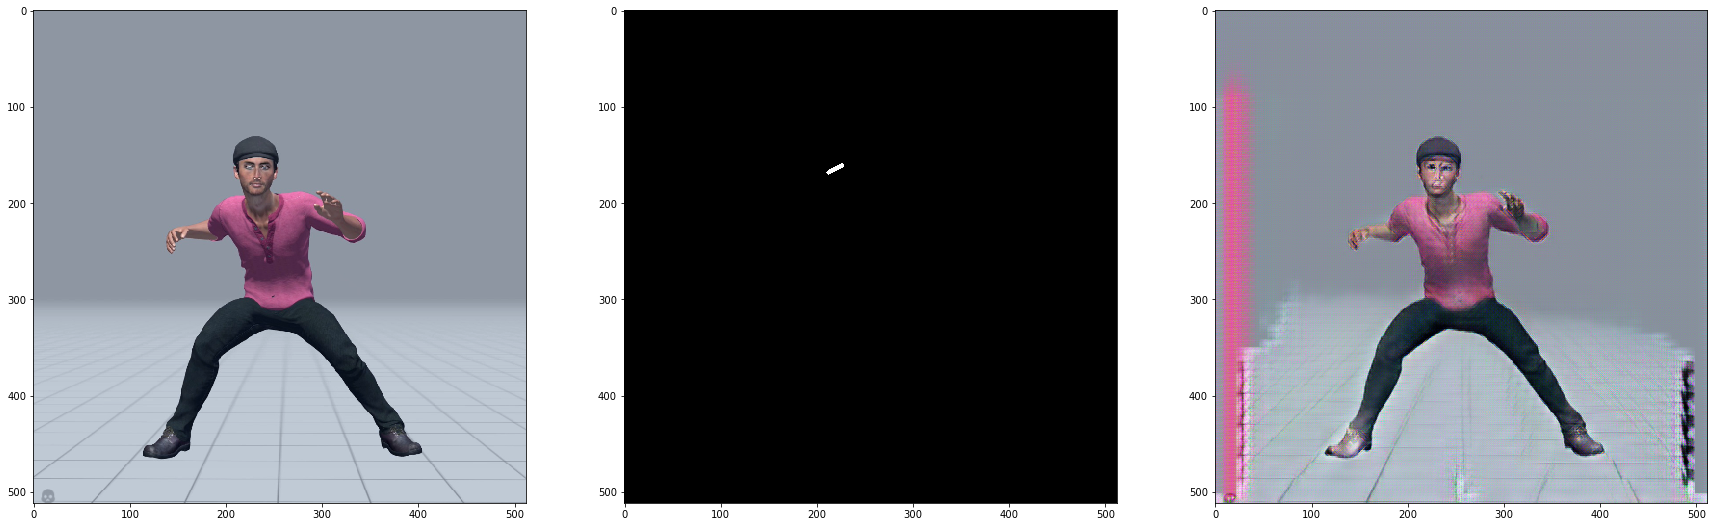

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,60))
plt.subplot(1,3,1)
plt.imshow(in_img[0,...].detach().cpu().numpy().transpose(1,2,0))
plt.subplot(1,3,2)
plt.imshow(lbl_sample[0,16,...].detach().cpu().numpy(),"gray")
plt.subplot(1,3,3)
plt.imshow(out_img[0,...].detach().cpu().numpy().transpose(1,2,0))
plt.show()

In [10]:
lbl_sample

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 

In [62]:
import torch.nn as nn
LABEL_NC=0
DATA_TYPE=32
NO_INSTANCE=True
USE_FEATURES=True
LOAD_FEATURES=False
LABEL_FEAT=False
def get_edges(t):
        edge = torch.cuda.ByteTensor(t.size()).zero_()
        edge[:,:,:,1:] = edge[:,:,:,1:] | (t[:,:,:,1:] != t[:,:,:,:-1])
        edge[:,:,:,:-1] = edge[:,:,:,:-1] | (t[:,:,:,1:] != t[:,:,:,:-1])
        edge[:,:,1:,:] = edge[:,:,1:,:] | (t[:,:,1:,:] != t[:,:,:-1,:])
        edge[:,:,:-1,:] = edge[:,:,:-1,:] | (t[:,:,1:,:] != t[:,:,:-1,:])
        if DATA_TYPE==16:
            return edge.half()
        else:
            return edge.float()
        
def encode_input(label_map, inst_map=None, real_image=None, feat_map=None, infer=False):             
    if LABEL_NC == 0:
        input_label = label_map.data.cuda()
    else:
        # create one-hot vector for label map 
        size = label_map.size()
        oneHot_size = (size[0], LABEL_NC, size[2], size[3])
        input_label = torch.cuda.FloatTensor(torch.Size(oneHot_size)).zero_()
        input_label = input_label.scatter_(1, label_map.data.long().cuda(), 1.0)
        if DATA_TYPE == 16:
            input_label = input_label.half()

    # get edges from instance map
    if not NO_INSTANCE:
        inst_map = inst_map.data.cuda()
        edge_map = get_edges(inst_map)
        input_label = torch.cat((input_label, edge_map), dim=1)         
    input_label = Variable(input_label, volatile=infer)

    # real images for training
    if real_image is not None:
        real_image = Variable(real_image.data.cuda())

    # instance map for feature encoding
    if USE_FEATURES:
        # get precomputed feature maps
        if LOAD_FEATURES:
            feat_map = Variable(feat_map.data.cuda())
        if LABEL_FEAT:
            inst_map = label_map.cuda()

    return input_label, inst_map, real_image, feat_map

In [41]:
input_label, inst_map, real_image, feat_map=encode_input(bb.sum(1).unsqueeze(1))

RuntimeError: CUDA error: device-side assert triggered

In [5]:
print(bb.shape)
print(bb.max(),bb.min())

torch.Size([10, 3, 256, 512])
tensor(255.) tensor(0.)


In [19]:
cc=bb.max(1).values.unsqueeze(1)

In [20]:
cc.shape

torch.Size([10, 1, 256, 512])

In [4]:
B=bb.view(10,3,256*512)

In [11]:
B=bb.detach().transpose(1,3).contiguous().view(10*256*512,3).numpy().copy()
print(B.shape)
print(B.max())

(1310720, 3)
255.0


In [12]:
import numpy as np
V=(B!=255).any(1)
M=np.intc(B[V,:])
M.shape

(25023, 3)

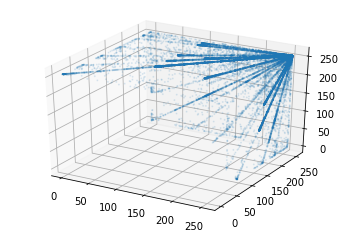

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax,xs=M[:,0],ys= M[:,1], zs=M[:,2],alpha=0.1,s=1)

In [57]:
import numpy as np
M=np.intc(np.sort(M,axis=0))

In [38]:
cc.shape

(256, 512, 3)

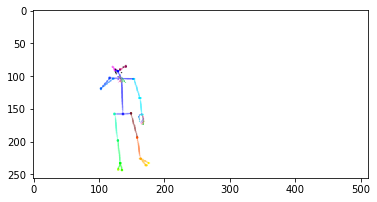

In [3]:
cc=bb[0,...].detach().numpy().copy().transpose(1,2,0)

plt.imshow(np.intc(cc))

In [8]:
bb.max(1).values.shape

torch.Size([10, 256, 512])

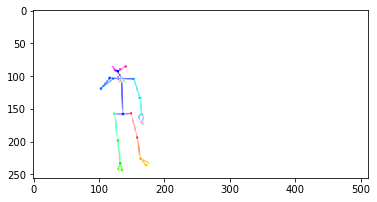

In [10]:
dd=(bb/(bb.max(1).values).unsqueeze(1))[0].detach().numpy().copy().transpose(1,2,0)
plt.imshow(dd)

NameError: name 'input_label' is not defined

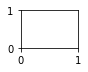

In [32]:
for ii in range(21):
    plt.subplot(5,5,ii+1)
    plt.imshow(input_label[0,ii,...].detach().cpu())